In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\yukti\Downloads\exoplanets_2018.csv")
print(df.shape)
df.head()

(9564, 49)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,...,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [4]:
df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

In [5]:
df.isna().any()

KepID                                                    False
KOIName                                                  False
KeplerName                                                True
ExoplanetArchiveDisposition                              False
DispositionUsingKeplerData                               False
DispositionScore                                          True
NotTransit-LikeFalsePositiveFlag                         False
koi_fpflag_ss                                            False
CentroidOffsetFalsePositiveFlag                          False
EphemerisMatchIndicatesContaminationFalsePositiveFlag    False
OrbitalPeriod[days                                       False
OrbitalPeriodUpperUnc.[days                               True
OrbitalPeriodLowerUnc.[days                               True
TransitEpoch[BKJD                                        False
TransitEpochUpperUnc.[BKJD                                True
TransitEpochLowerUnc.[BKJD                             

In [6]:
df.isnull().sum()

KepID                                                       0
KOIName                                                     0
KeplerName                                               7205
ExoplanetArchiveDisposition                                 0
DispositionUsingKeplerData                                  0
DispositionScore                                         1510
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod[days                                          0
OrbitalPeriodUpperUnc.[days                               454
OrbitalPeriodLowerUnc.[days                               454
TransitEpoch[BKJD                                           0
TransitEpochUpperUnc.[BKJD                                454
TransitEpochLowerUnc.[BKJD                                454
ImpactPa

In [7]:
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K'], inplace=True)

In [8]:
for column in df.columns[df.isna().sum() > 0]:
    df[column] = df[column].fillna(df[column].mean())

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,...,StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,1.000,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
1,0.969,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
2,0.000,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1.0,1.0
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0.0,0.0
4,1.000,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,...,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0.0,0.0
9560,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,...,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1.0,1.0
9561,0.021,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,...,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0.0,0.0
9562,0.092,333.486169,4.240000e-03,-4.240000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,...,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998,1.0,1.0


In [10]:
x = df.drop(columns=['ExoplanetCandidate','ExoplanetConfirmed'])
y = df.ExoplanetCandidate

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.35, random_state=42)

In [12]:
x_train.head()

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,...,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
8273,0.000,5.243978,2.930000e-04,-2.930000e-04,132.682900,0.055200,-0.055200,0.820,0.144,-0.576,...,-230.0,4.481,0.054,-0.216,0.956,0.306,-0.102,291.82001,41.697842,14.967
8919,0.000,1.613015,1.850000e-07,-1.850000e-07,131.748292,0.000094,-0.000094,0.882,0.014,-0.015,...,-325.0,3.836,0.352,-0.088,2.779,0.383,-1.150,300.33246,44.144138,12.146
1979,0.995,78.099891,6.630000e-04,-6.630000e-04,139.496460,0.006560,-0.006560,0.528,0.001,-0.473,...,-78.0,4.238,0.143,-0.117,1.284,0.215,-0.215,292.30124,38.267040,14.999
1883,1.000,37.996237,1.520000e-04,-1.520000e-04,162.979840,0.003310,-0.003310,0.023,0.395,-0.023,...,-121.0,4.284,0.137,-0.112,1.191,0.189,-0.189,291.11188,39.949108,14.247
438,0.848,9.931463,5.190000e-05,-5.190000e-05,136.491280,0.004420,-0.004420,0.037,0.408,-0.037,...,-78.0,4.280,0.137,-0.112,1.220,0.196,-0.176,291.49942,37.059280,15.214


In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)

In [ ]:
import numpy as np;
import seaborn as sns; 
ax = sns.heatmap(df)

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train,y_train)

In [17]:
def evaluate_model(clf, x_test, y_test, model_name, oversample_type):
    print('--------------------------------------------')
    print('Model ', model_name)
    print('Data Type ', oversample_type)
    y_pred = clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    print(classification_report(y_test, y_pred))
    print("Accuracy ",accuracy)
    print("F1 Score ", f1)
    print("Recall ", recall)
    print("Precision ", precision)
    return [model_name, oversample_type, f1, recall, precision]

In [18]:
models = {
    'Logistic Regression':LogisticRegression(random_state=10),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier':RandomForestClassifier(random_state=42),
    'Support Vector Machine Classifier':SVC(random_state=0),
    'Naive Bayes Classifier':GaussianNB(),
}

In [16]:
oversampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
}

In [17]:
final_output = []
for model_k, model_clf in models.items():
    for data_type, data in oversampled_data.items():
        model_clf.fit(data[0], data[1])
        final_output.append(evaluate_model(model_clf,x_test, y_test, model_k, data_type))

--------------------------------------------
Model  Logistic Regression
Data Type  ACTUAL
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1767
           1       0.74      0.76      0.75      1581

    accuracy                           0.76      3348
   macro avg       0.76      0.76      0.76      3348
weighted avg       0.76      0.76      0.76      3348

Accuracy  0.7604540023894862
F1 Score  0.7606098157451582
Recall  0.7604540023894862
Precision  0.7611910276841674
--------------------------------------------
Model  Logistic Regression
Data Type  SMOTE
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1767
           1       0.72      0.80      0.76      1581

    accuracy                           0.76      3348
   macro avg       0.76      0.76      0.76      3348
weighted avg       0.76      0.76      0.76      3348

Accuracy  0.7592592592592593
F1 Score  0.75933675252

0    5068
1    4496
Name: ExoplanetCandidate, dtype: int64


Text(0, 0.5, 'Cases')

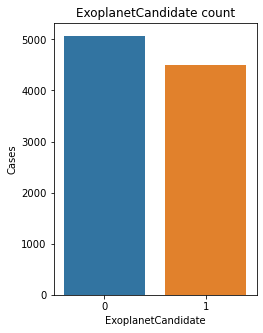

In [18]:
print(df["ExoplanetCandidate"].value_counts())

plt.figure(figsize = (8,5))
plt.subplot(121)
sns.countplot(x="ExoplanetCandidate", data=df)
plt.title("ExoplanetCandidate count")
plt.xlabel("ExoplanetCandidate")
plt.ylabel("Cases")

In [19]:
final_df = pd.DataFrame(final_output, columns=['Model', 'DataType','Recall', 'Precision','Accuracy'])

In [20]:
final_df.sort_values(by="Accuracy", ascending=False)

,Model,DataType,Recall,Precision,Accuracy
5,Random Forest Classifier,SMOTE,0.952971,0.953106,0.954884
4,Random Forest Classifier,ACTUAL,0.950869,0.951016,0.952880
2,Decision Tree Classifier,ACTUAL,0.928344,0.928315,0.928502
3,Decision Tree Classifier,SMOTE,0.928340,0.928315,0.928461
6,Support Vector Machine Classifier,ACTUAL,0.660228,0.680108,0.763349
1,Logistic Regression,SMOTE,0.759337,0.759259,0.763065
0,Logistic Regression,ACTUAL,0.760610,0.760454,0.761191
7,Support Vector Machine Classifier,SMOTE,0.641863,0.666069,0.758756
9,Naive Bayes Classifier,SMOTE,0.535239,0.594683,0.752513
8,Naive Bayes Classifier,ACTUAL,0.533874,0.593787,0.752055


In [21]:
param_grid = {
  'criterion':['gini', 'entropy'],
  'max_depth': [20, 40, 100],
  'max_features': ['auto', 'sqrt'],
  'n_estimators': [600, 800, 1000, 2000]
}

In [22]:
rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2, verbose=2)
rfc_cv.fit(x_train,y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=600; total time=   4.2s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=600; total time=   4.5s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=800; total time=   5.6s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=800; total time=   6.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=1000; total time=   6.9s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=1000; total time=   7.5s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=2000; total time=  13.7s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=2000; total time=  14.2s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=600; total time=   4.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=600; tota

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, 100],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [600, 800, 1000, 2000]},
             verbose=2)

In [23]:
params = rfc_cv.best_params_
print(params)

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'n_estimators': 800}


In [24]:
rf = RandomForestClassifier(n_estimators=params['n_estimators'], 
                            criterion=params['criterion'], 
                            max_depth=params['max_depth'], 
                            max_features=params['max_features'])
rf.fit(x_train, y_train)
evaluate_model(rf, x_test, y_test, 'RandomForest', 'ACTUAL')

--------------------------------------------
Model  RandomForest
Data Type  ACTUAL
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1767
           1       0.98      0.91      0.95      1581

    accuracy                           0.95      3348
   macro avg       0.95      0.95      0.95      3348
weighted avg       0.95      0.95      0.95      3348

Accuracy  0.9501194743130227
F1 Score  0.9499788855770086
Recall  0.9501194743130227
Precision  0.9518054234181442


['RandomForest',
 'ACTUAL',
 0.9499788855770086,
 0.9501194743130227,
 0.9518054234181442]

In [25]:
rf.feature_importances_

array([0.04486281, 0.43361366, 0.02009522, 0.01128779, 0.01186524,
       0.01109076, 0.00843829, 0.00879751, 0.01253727, 0.00851091,
       0.00634811, 0.01351804, 0.01486869, 0.01381626, 0.01420101,
       0.00860635, 0.00889571, 0.05698025, 0.03537751, 0.03693964,
       0.0128537 , 0.01712898, 0.01907668, 0.01386493, 0.01979064,
       0.00374759, 0.00579971, 0.03282067, 0.02882553, 0.00562433,
       0.00543522, 0.00969106, 0.00582787, 0.00738959, 0.00516968,
       0.00876558, 0.00916238, 0.00837482])

In [26]:
x_train=pd.DataFrame(x_train)

In [27]:
feature_results = pd.DataFrame({'Feature': list(x_train.columns), 
                                'importance': rf.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,Feature,importance
0,DispositionScore,0.433614
1,PlanetaryRadius[Earthradii,0.056980
2,rowid,0.044863
3,PlanetaryRadiusLowerUnc.[Earthradii,0.036940
4,PlanetaryRadiusUpperUnc.[Earthradii,0.035378
5,StellarEffectiveTemperatureUpperUnc.[K,0.032821
6,StellarEffectiveTemperatureLowerUnc.[K,0.028826
7,OrbitalPeriod[days,0.020095
8,TransitSignal-to-Nois,0.019791
9,InsolationFluxUpperUnc.[Earthflux,0.019077


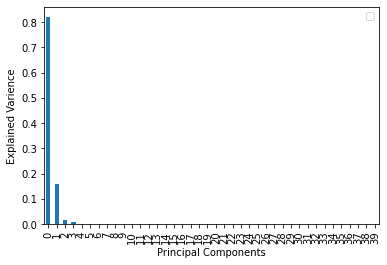

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df))
df_pca
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');